In [1]:
import pandas as pd
import numpy as np
import datetime
from importlib import reload
from tqdm import tqdm
import scipy.sparse as spa
import matplotlib.pyplot as plt
import cvxpy as cp
import torch
import tensorflow as tf
from torch.utils.data import TensorDataset, DataLoader
from cvxpylayers.torch import CvxpyLayer

In [2]:
# full_data = pd.read_csv("yellow_tripdata_2010-01.csv")
# full_data['pickup_datetime'] = pd.to_datetime(full_data['pickup_datetime'])
# full_data['dropoff_datetime'] = pd.to_datetime(full_data['dropoff_datetime'])

In [3]:
year = 2010
month = 1
day = 21
date = datetime.date(year, month, day)

In [4]:
# day_data = full_data.loc[(full_data['pickup_datetime'].dt.date == date) & (full_data['dropoff_datetime'].dt.date == date)]
# day_data = day_data[['pickup_datetime', 'dropoff_datetime', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount']]
# day_data = day_data.loc[(day_data['pickup_longitude'] != 0) & (day_data['pickup_latitude'] != 0)]
# day_data.to_csv(r'yellow_tripdata_2010-01-21.csv', index=False)

In [5]:
day_data = pd.read_csv("yellow_tripdata_2010-01-21.csv")
day_data['pickup_datetime'] = pd.to_datetime(day_data['pickup_datetime'])
day_data['dropoff_datetime'] = pd.to_datetime(day_data['dropoff_datetime'])

In [6]:
n = 200
data = day_data.sample(n).sort_values(by='pickup_datetime')
data.index = range(n)

## Vector Formulation

In [ ]:
import class_TP
reload(class_TP)
from class_TP import TP

time_windows = [5, 10, 20]
obj_val = []
runtimes = []

tp = TP(data)
for time_window in time_windows:
    x, problem = tp.problem_window(time_window)
    
#     sims = 10
#     run_time = 0
#     for i in range(sims):
#         problem.solve()
#         run_time += problem.solver_stats.solve_time
#     run_times.append(run_time/sims)

    problem.solve(TimeLimit = 300)
    obj_val.append(-problem.objective.value)
    runtimes.append(problem.solver_stats.solve_time)
    
    print("Time Window:", time_window)
    print("Run Time:", problem.solver_stats.solve_time)
    print("Objective Value:", -problem.objective.value)
#     x_val = spa.dok_matrix((tp.num_nodes, tp.num_nodes))
#     for a in range(tp.num_arcs):
#         x_val[tp.arcs[a]] = np.around(x[a].value, decimals=2)
#     print(x_val.tocoo())

plt.figure(1)
plt.plot(time_windows, runtimes);
plt.title("Run Time");
plt.xlabel("Time Window");
plt.ylabel("Run Time");
plt.figure(2)
plt.plot(time_windows, obj_val);
plt.title("Profit");
plt.xlabel("Time Window");
plt.ylabel("Profit");

Time Window: 5
Run Time: None
Objective Value: 950.0296911740364


In [7]:
import class_TP
reload(class_TP)
from class_TP import TP

time_windows = [5, 10, 20]
obj_val = []
runtimes = []

tp = TP(data)
for time_window in time_windows:
    x, problem = tp.problem_window(time_window)
    
#     sims = 10
#     run_time = 0
#     for i in range(sims):
#         problem.solve()
#         run_time += problem.solver_stats.solve_time
#     run_times.append(run_time/sims)

    problem.solve(verbose=True)
    obj_val.append(-problem.objective.value)
    runtimes.append(problem.solver_stats.solve_time)
    
    print("Time Window:", time_window)
    print("Run Time:", problem.solver_stats.solve_time)
    print("Objective Value:", -problem.objective.value)
#     x_val = spa.dok_matrix((tp.num_nodes, tp.num_nodes))
#     for a in range(tp.num_arcs):
#         x_val[tp.arcs[a]] = np.around(x[a].value, decimals=2)
#     print(x_val.tocoo())

plt.figure(1)
plt.plot(time_windows, runtimes);
plt.title("Run Time");
plt.xlabel("Time Window");
plt.ylabel("Run Time");
plt.figure(2)
plt.plot(time_windows, obj_val);
plt.title("Profit");
plt.xlabel("Time Window");
plt.ylabel("Profit");

                                     CVXPY                                     
                                    v1.1.11                                    
(CVXPY) Mar 26 10:40:27 AM: Your problem has 20750 variables, 8 constraints, and 0 parameters.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

In [8]:
import class_TP
reload(class_TP)
from class_TP import TP

tp = TP(data)
window = 0  # fixed at zero
t, x, problem = tp.problem_param(window)
t_min, _ = tp.time_cons(window)
t_vals = t_min[:]

t_range = 20
step = 2
dim = int(t_range/step)
heat_map = np.zeros((dim, dim))
run_times = np.zeros((dim, dim))
t0_vec = np.arange(0, t_range, step)
t1_vec = np.arange(0, t_range, step)
c1 = 15
c2 = 16
for t0_idx in range(len(t0_vec)):
    for t1_idx in range(len(t1_vec)):
        t0 = t0_vec[t0_idx]
        t1 = t1_vec[t1_idx]
        t_vals[c1] = t_min[c1] + t0
        t_vals[c2] = t_min[c2] + t1
        t.value = t_vals
        problem.solve(solver="ECOS")
        obj_val = -problem.objective.value
        run_time = problem.solver_stats.solve_time
        heat_map[t0_idx, t1_idx] = obj_val
        run_times[t0_idx, t1_idx] = run_time
        
        print("Run Time:", run_time)
#         print("Objective Value:", obj_val)
#         print(t.value[c1], t.value[c2])

#         x_val = spa.dok_matrix((tp.num_nodes, tp.num_nodes))
#         for a in range(tp.num_arcs):
#             x_val[tp.arcs[a]] = np.around(x[a].value, decimals=2)
#         print(x_val.tocoo())

Run Time: 0.1008728
Run Time: 0.1162375
Run Time: 0.1373452
Run Time: 0.1404041
Run Time: 0.1169746
Run Time: 0.2042596
Run Time: 0.1086392
Run Time: 0.1171832
Run Time: 0.122976
Run Time: 0.1146664
Run Time: 0.1595448
Run Time: 0.1196764
Run Time: 0.1827466
Run Time: 0.1145813
Run Time: 0.1209741
Run Time: 0.1621789
Run Time: 0.1875264
Run Time: 0.1961291
Run Time: 0.1812618
Run Time: 0.2140715
Run Time: 0.174247
Run Time: 0.1909979
Run Time: 0.2008207
Run Time: 0.1677234
Run Time: 0.1727318
Run Time: 0.1026948
Run Time: 0.1101213
Run Time: 0.1097271
Run Time: 0.1608175
Run Time: 0.1451425
Run Time: 0.0906714
Run Time: 0.1762985
Run Time: 0.103102
Run Time: 0.1493531
Run Time: 0.1318923
Run Time: 0.1776844
Run Time: 0.130563
Run Time: 0.1154287
Run Time: 0.2244114
Run Time: 0.1027529
Run Time: 0.1933858
Run Time: 0.1651073
Run Time: 0.198501
Run Time: 0.1177862
Run Time: 0.1935686
Run Time: 0.1891117
Run Time: 0.1920918
Run Time: 0.1105273
Run Time: 0.1064391
Run Time: 0.1740807
Run T

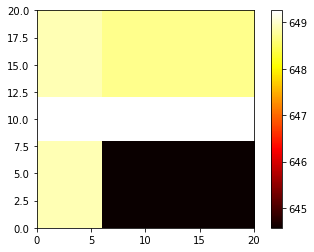

In [9]:
plt.imshow(heat_map, cmap='hot', interpolation='nearest', extent=[0, t_range, 0, t_range])
plt.colorbar()
plt.show()

In [10]:
heat_map

array([[648.90443654, 648.90443654, 648.90443654, 648.72165146,
        648.72165146, 648.72165147, 648.72165147, 648.72165146,
        648.72165147, 648.72165147],
       [648.90443654, 648.90443654, 648.90443654, 648.72165146,
        648.72165146, 648.72165147, 648.72165147, 648.72165146,
        648.72165147, 648.72165147],
       [648.90443654, 648.90443654, 648.90443654, 648.72165146,
        648.72165146, 648.72165147, 648.72165147, 648.72165146,
        648.72165147, 648.72165147],
       [648.90443654, 648.90443654, 648.90443654, 648.72165146,
        648.72165146, 648.72165147, 648.72165147, 648.72165146,
        648.72165147, 648.72165147],
       [649.25943505, 649.25943505, 649.25943505, 649.25943505,
        649.25943505, 649.25943505, 649.25943505, 649.25943505,
        649.25943505, 649.25943505],
       [649.25943505, 649.25943505, 649.25943505, 649.25943505,
        649.25943505, 649.25943505, 649.25943505, 649.25943505,
        649.25943505, 649.25943505],
       [64

In [11]:
# run_seconds = [t / 60 for t in run_times]
# run_seconds

## Gradient Descent

In [9]:
def f(x):
    return np.transpose(p) @ x

def df(x):
    return t.gradient  # ?
#     return p

def line_search(x, alpha=0.5, beta=0.9):
    r = 1
    for k in range(200):
        problem.solve(requires_grad=True, solver=cp.DIFFCP, solve_method="ECOS")
        f_next = f(x + r * dx)
        x.gradient = -p  # ?
        problem.backward()
        f_extrap = f(x) + alpha * r * df(x).T.dot(dx)
        print(f_next)
        print(f_extrap)
        if f_next <= f_extrap:
            return x + r * dx
        r *= beta

In [10]:
import class_TP
reload(class_TP)
from class_TP import TP

tp = TP(data)
window = 1
t, x, problem = tp.problem_param()
t_min, t_max = tp.time_cons(window)
_,_,_,p = tp.flow_vars()
t.value = [(a + b) / 2.0 for a, b in zip(t_min, t_max)]

iters = 100
t_hist = []
loss_hist = []
runtime_hist = []
for i in range(iters):
    if (i > 1 and loss_hist[-2] - loss_hist[-1] < .1):
        print("Line search converged in %d iterations" % (i))
        break
    dx = -df(x)
    x = line_search(x)
    
    t_hist.append(t.value)
    loss_hist.append(problem.objective.value)
    runtime_hist.append(problem.solver_stats.solve_time)

    print("Iteration", i)
    print("Objective Value:", -problem.objective.value)
    print("Runt Time:", problem.solver_stats.solve_time)

[ 5.1588076   8.62114603  9.11817331  6.71653133  3.78098254  4.91590914
  2.89893838  2.6660399   9.43440004  8.06323652  5.16708239  3.44967913
  6.65929619  4.77520718 38.63799341  5.10535945 12.45083243  3.72000899
  2.88659711  0.          7.25640809 10.32220827  7.44069298  4.95364705
  4.23334576  4.38247331  4.14996216 10.90331031  8.67462598  6.64691668
  4.87241759  6.87359497  6.24757228 39.8258168   5.39500007 13.49558782
  4.82538758  4.27870366  6.57338183  0.          8.58766616  6.21989634
  3.24309511  4.8374381   2.44283963  2.21027295  8.95267483  7.55493261
  4.72840579  2.93990311  6.14174619  4.35301046 38.15417837  4.57133355
 11.93098299  3.21786882  2.37271913  7.07783329  0.          4.58614217
  3.15572375  1.33562119  2.38657892  2.37270883  9.34538275  5.84642285
  5.94930059  5.84142398  4.04048073  6.25879283 36.96013995  2.6229421
 10.86903607  2.05134777  3.36467765 10.24252823  0.          3.91877379
  4.99601418  3.06055756  2.82757488  9.59198189  8.

Exception: Cannot evaluate the truth value of a constraint or chain constraints, e.g., 1 >= x >= 0.

In [16]:
import class_TP
reload(class_TP)
from class_TP import TP

tp = TP(data)
window = 1
t, x, problem = tp.problem_param()
t_min, t_max = tp.time_cons(window)
_,_,_,p = tp.flow_vars()
t.value = [(a + b) / 2.0 for a, b in zip(t_min, t_max)] # average of window
# t.value = t_min[:]

iters = 20
learn_rate = .1
t_hist = []
loss_hist = []
runtime_hist = []
for i in range(iters):
#     acceleration_lookback=10, eps=1e-03, max_iters=1000
    problem.solve(requires_grad=True, solver=cp.DIFFCP, solve_method="ECOS")
    x.gradient = -p
    problem.backward()
    t.value -= learn_rate * t.gradient
    t.value = np.minimum(np.maximum(t.value, t_min), t_max)
    
    t_hist.append(t.value)
    loss_hist.append(problem.objective.value)
    runtime_hist.append(problem.solver_stats.solve_time)

    print("Iteration", i)
    print("Objective Value:", -problem.objective.value)
    print("Runt Time:", problem.solver_stats.solve_time)
    
#     x_val = spa.dok_matrix((tp.num_nodes, tp.num_nodes))
#     for a in range(tp.num_arcs):
#         x_val[tp.arcs[a]] = np.around(x[a].value, decimals=2)
#     print(x_val.tocoo())

Iteration 0
Objective Value: 775.0384117576327
Iteration 1
Objective Value: 778.2516327148282
Iteration 2
Objective Value: 784.5684349698762
Iteration 3
Objective Value: 784.5684349695255


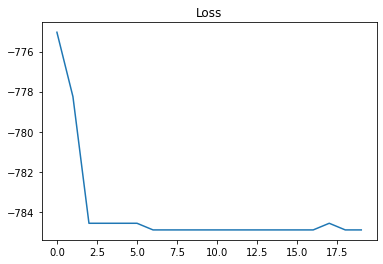

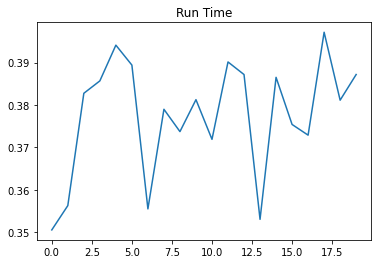

In [9]:
plt.figure(1)
plt.plot(loss_hist);
plt.title("Loss");
plt.figure(2)
plt.plot(runtime_hist);
plt.title("Run Time");

In [ ]:
import class_TP
reload(class_TP)
from class_TP import TP

tp = TP(data)
window = 1
t, x, problem = tp.problem_param()
t_min, t_max = tp.time_cons(window)
_,_,_,p = tp.flow_vars()
t.value = [(a + b) / 2.0 for a, b in zip(t_min, t_max)] # average of window
# t.value = t_min[:]

learn_rate = .1
t_hist = []
loss_hist = []
runtime_hist = []
i = 0
while (i < 2 or loss_hist[-2] - loss_hist[-1] > .1):
#     acceleration_lookback=10, eps=1e-03, max_iters=1000
    problem.solve(requires_grad=True, solver=cp.DIFFCP, solve_method="ECOS")
    x.gradient = -p
    problem.backward()
    t.value -= learn_rate * t.gradient
    t.value = np.minimum(np.maximum(t.value, t_min), t_max)
    
    t_hist.append(t.value)
    loss_hist.append(problem.objective.value)
    runtime_hist.append(problem.solver_stats.solve_time)

    print("Iteration", i)
    print("Objective Value:", -problem.objective.value)
    print("Runt Time:", problem.solver_stats.solve_time)
    i += 1
    
#     x_val = spa.dok_matrix((tp.num_nodes, tp.num_nodes))
#     for a in range(tp.num_arcs):
#         x_val[tp.arcs[a]] = np.around(x[a].value, decimals=2)
#     print(x_val.tocoo())

## Other

In [ ]:
# x-axis: iteration, y-axis: -profit
# can also track first two t-value elements (see where they're going on 2D plane)
# for above


# torch.set_default_dtype(torch.double)
import class_TP
reload(class_TP)
from class_TP import TP

tp = TP(data)
window = 0  # fixed at zero
t, x, _, problem = tp.problem_param()
layer = CvxpyLayer(problem, [t], [x])

t_th = torch.rand(t.shape, requires_grad=True)
output = layer(t_th)

# _,_,_,p = tp.flow_vars()
# loss = torch.dot(torch.from_numpy(p), tf.convert_to_tensor(x))

# # Torch.opt.SGD
# opt.zero_grad()
# l = loss(Xbatch, Ybatch)
# l.backward()
# opt.step()

## Map
Needs updating

In [ ]:
import geopandas as gpd
import contextily as ctx

In [ ]:
x_val = spa.dok_matrix((n+taxis+2, n+taxis+2))
for i in range(n+taxis+2):
    for j in s_list[i]:
        x_val[i,j] = x[arcs.get((i,j))].value
print("Time Window:", time_window)
print(x_val.tocoo())
print(objective.value)

In [ ]:
arcs = np.asarray(np.nonzero(x_val))
# locs = np.unique(arcs[arcs < 200])
# lons = data.iloc[locs, 3]
# lats = data.iloc[locs, 4]

loc_origin = arcs[0][:-taxis-2]
loc_destin = arcs[1][:-taxis-2]

lon_origin = data.iloc[loc_origin, 3].to_numpy()
lat_origin = data.iloc[loc_origin, 4].to_numpy()
lon_destin = data.iloc[loc_destin, 3].to_numpy()
lat_destin = data.iloc[loc_destin, 4].to_numpy()

In [ ]:
# from shapely.geometry import Point, LineString
from matplotlib.patches import FancyArrowPatch

nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
# nyc = nyc.to_crs(epsg=3857)
nyc = nyc.to_crs(epsg=4326)
ax = nyc.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

ax.set_xlim(-74.05, -73.85)
ax.set_ylim(40.68, 40.82)

# nodes = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lons, lats))
# nodes.plot(color='green')

fig = plt.figure()

# One Taxi's Journey
taxi_num = n + 1
node = arcs[1][np.where(arcs[0] == taxi_num)] # First node (rider) for given taxi
while True:
    where = np.array(np.where(loc_origin == node))
    if (where.size == 0): break
    i = where[0][0]
    dx = lon_destin[i] - lon_origin[i]
    dy = lat_destin[i] - lat_origin[i]
    ax.arrow(lon_origin[i], lat_origin[i], dx, dy, color = 'pink', width=.0004)
    node = loc_destin[i]

plt.show()